[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 10), (10, 9), (9, 18), (18, 19), (19, 12), (12, 11), (11, 10), (10, 5), (5, 6), (6, 17), (17, 16), (16, 15), (15, 19), (19, 18), (18, 17), (17, 6), (6, 7), (7, 8), (8, 13), (13, 14), (14, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
False


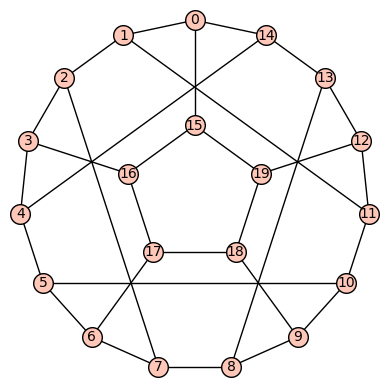

In [36]:
def neighbors(G):
    
        #this function gives me the set of all neighbors of vertices in the graph.
        
    V = G.vertices()
    E = G.edges(labels=None)

    N = []
    for i in V:
        s=[]
        for j in V:
            if (i,j) in E or (j,i) in E:
                s.append(j)
        N.append(s)
    return N
    
from itertools import permutations

def Perm(G):
  #this function computes all permutations of the neighbors of each vertex i in {0,1,...,n} and returns them in 2-dim array.

    Permutations = []
    for i in range(len(neighbors(G))):
        perm = permutations(neighbors(G)[i])
        Permutations.append(list(perm))
   
    return Permutations


import random

def phi(S,x):
    #in permutation S = (0,1,...,n-1) we have phi(S,i) = i+1 (mod n).
    for i in range (0,len(S)-1):
        if S[i] == x:
            return S[i+1]
    for i in range (len(S)-1,len(S)):
        if S[i] == x:
            return S[0]


G = graphs.FlowerSnark()

V = G.vertices()
E = G.edges(labels=None)

e1 = E[0]
Neighbor = Perm(G)

    #set of local rotations.
random_perm = []
for i in range (0,len(Neighbor)):
    ran = random.choice(Neighbor[i])
    random_perm.append(ran)

    #the following code privides me with a set of random edges chosen by local rotations.
random_edges = [e1]
for i in range (len(E)):
    v2 = phi(random_perm[e1[1]], e1[0])
    e2 = (e1[1],v2)
    random_edges.append(e2)
    e1 = e2
    
print(random_edges)

Temp = []
Answers = []
for i in range (1, len(random_edges)):
    Temp.append(random_edges[i-1])
    for j in range (0,i):
            if random_edges[i][1] == random_edges[j][0] and random_edges[i][1] == 0:
                Answers.append('True')
                break
            elif random_edges[i][1] == random_edges[j][0]:    
                if random_edges[i][0]==random_edges[j][1]:
                    Answers.append('False')
                    break

print(Answers[0])          
G.show()